In [408]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import re
from operator import itemgetter
from tensorflow.keras import layers

# with open('./static/data/PS4_GamesSales.csv', 'r') as file:
#     data = list(csv.reader(file, delimiter=","))

# headers = data.pop(0)
# data = np.array(data)

# print(headers)
# print(data)

In [409]:
df = pd.read_csv('./static/data/PS4_GamesSales.csv')
# df.describe()
df1 = df.copy()
df1.head()


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [410]:
df1.shape

(99, 9)

In [411]:
df1.isna().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [412]:
# df1 = df1.dropna()

In [413]:
df1.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [447]:
group_na = df1.groupby('North America')['Genre'].sum()
print(group_na)

group_na = group_na.sort_values(ascending=False)
print(group_na)

genre_na = dict(group_na)
print(genre_na)


North America
0.29        Role-Playing
0.36                Misc
0.37        RacingSports
0.44       RacingShooter
0.45            Platform
              ...       
4.49              Action
4.67             Shooter
5.26    Action-Adventure
6.06              Action
6.18             Shooter
Name: Genre, Length: 75, dtype: object
North America
0.83                         SportsRole-Playing
0.62    SportsRacingActionAdventureRole-Playing
1.27                                     Sports
2.30                                     Sports
1.26                                     Sports
                         ...                   
0.82                                     Action
1.44                                     Action
1.22                                     Action
0.90                                     Action
0.73                                     Action
Name: Genre, Length: 75, dtype: object
{0.83: 'SportsRole-Playing', 0.62: 'SportsRacingActionAdventureRole-Playing', 1.27: 'Sports

In [424]:
group1 = df1.groupby('Genre')['Global'].sum()
print(group1)

group1 = group1.sort_values(ascending=False)
print(group1)

genre_global = dict(group1)
print(genre_global)

# genre_sorted = {}
# for i in group1:
#     genre_sorted.append()
# print(genre_sorted)

Genre
Action               99.17
Action-Adventure     49.83
Adventure             3.97
Fighting              6.91
MMO                   2.05
Misc                  8.49
Platform             11.15
Racing               15.00
Role-Playing         40.13
Shooter             118.00
Sports               67.51
Name: Global, dtype: float64
Genre
Shooter             118.00
Action               99.17
Sports               67.51
Action-Adventure     49.83
Role-Playing         40.13
Racing               15.00
Platform             11.15
Misc                  8.49
Fighting              6.91
Adventure             3.97
MMO                   2.05
Name: Global, dtype: float64
{'Shooter': 118.0, 'Action': 99.17, 'Sports': 67.51, 'Action-Adventure': 49.83, 'Role-Playing': 40.13, 'Racing': 15.0, 'Platform': 11.15, 'Misc': 8.49, 'Fighting': 6.91, 'Adventure': 3.9699999999999998, 'MMO': 2.05}


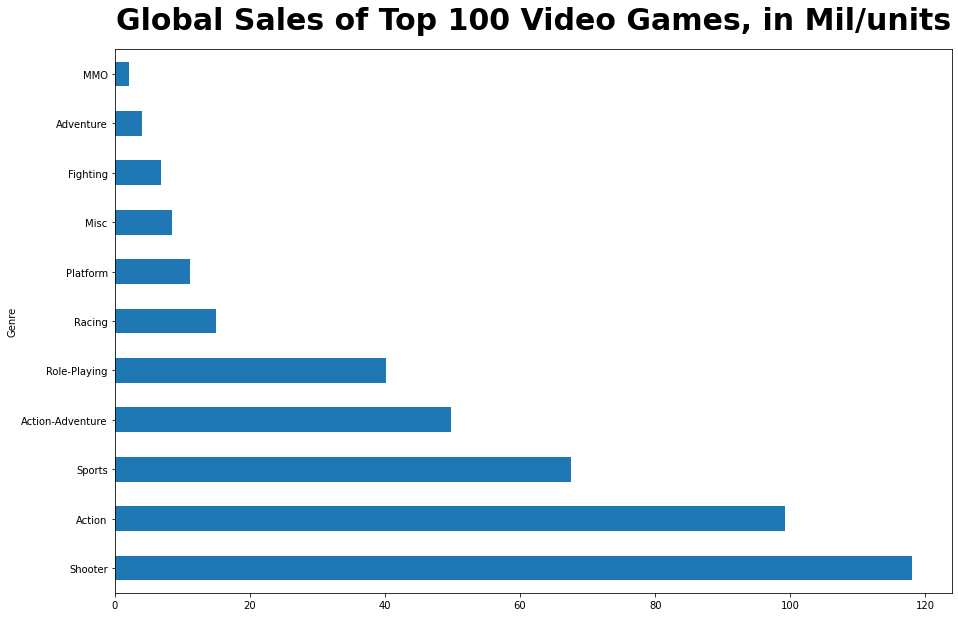

In [415]:
group1.plot(kind="barh", figsize=(15,10))
plt.title("Global Sales of Top 100 Video Games, in Mil/units", fontdict={"fontsize":30, "weight":"bold"}, pad=20)
plt.show()

In [432]:
df1.head()
print(df1["North America"])
na_values = []
for i in df1["North America"]:
    na_values.append(i)

0     6.06
1     6.18
2     5.26
3     4.67
4     1.27
      ... 
94    0.56
95    0.60
96    0.62
97    0.44
98    0.48
Name: North America, Length: 99, dtype: float64


In [ ]:
key_list = list(genre_global.keys())

x1 = group_na.dict.values()
y1 = group_na.dict.keys()

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90, label="genres")
plt.xlabel("Genres")
plt.ylabel("Sold Units")
plt.plot(x, y)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


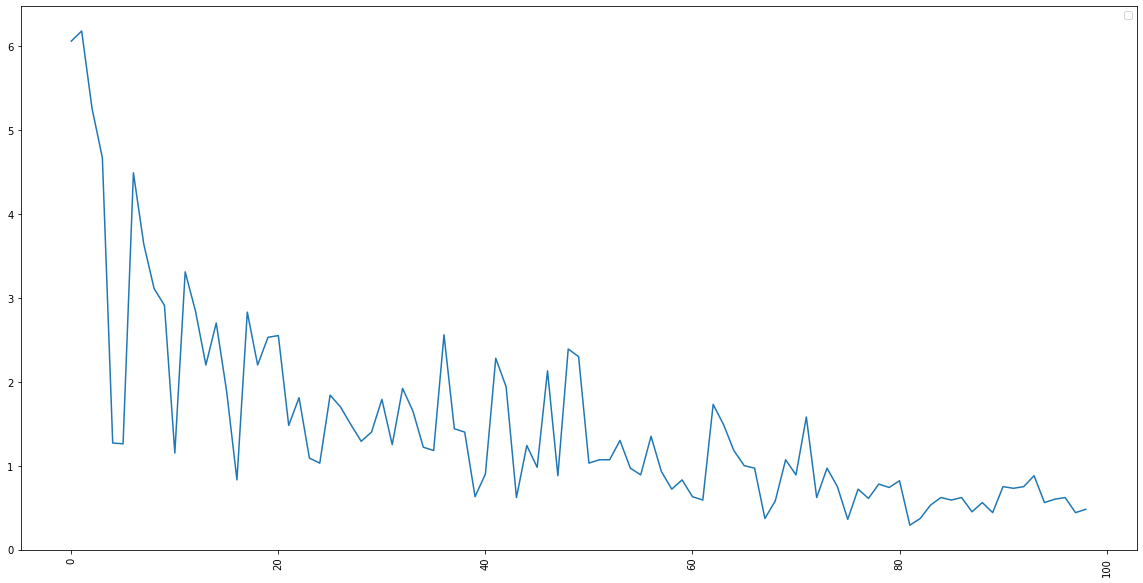

In [446]:
# genre1 = df1["Genre"]
# genre1 = genre1.sort_values(ascending=False)


key_list = list(genre_global.keys())
x = range(0, 99)

y = na_values

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90, label="genres")
plt.xlabel("Genres")
plt.ylabel("Sold Units")
plt.plot(x, y)


# y = na_values
# y1 = df1["North America"]
# y2 = df1["Europe"]
# x3 = df1["Japan"]
# x4 = df1["Rest of World"]
# x5 = df1["Global"]

# plt.xlim(0,100)
# plt.ylim(0,100)
# plt.axis("equal")

# plt.plot(x, y)
# plt.plot(x, y2)
# plt.plot(x3, y)
# plt.plot(x4, y)
# plt.plot(x5, y)
# plt.xticks(rotation=45)
# plt.show()

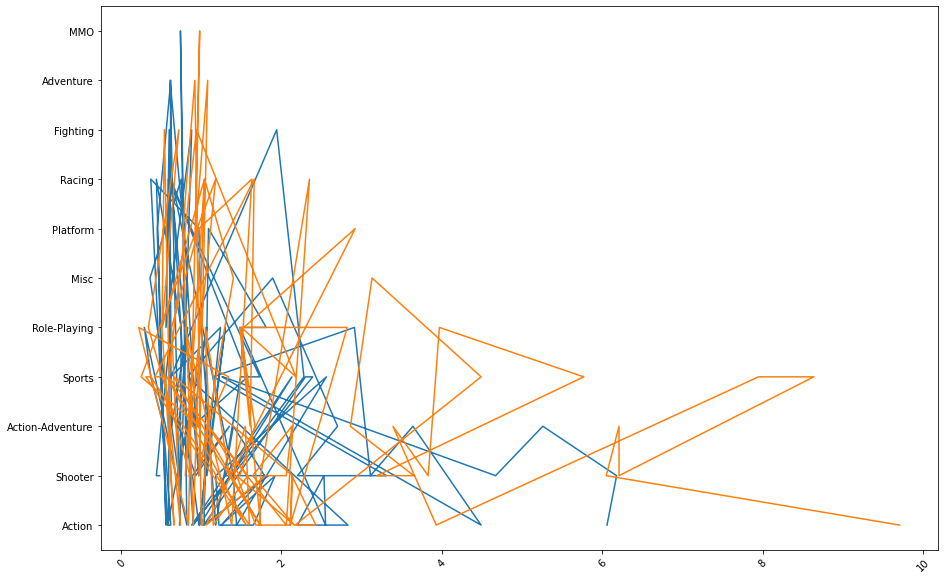

In [420]:
y = df1.Genre
x1 = df1["North America"]
x2 = df1["Europe"]
# x3 = df1["Japan"]
# x4 = df1["Rest of World"]
# x5 = df1["Global"]

plt.figure(figsize=(15,10))
plt.plot(x1, y)
plt.plot(x2, y)
# plt.plot(x3, y)
# plt.plot(x4, y)
# plt.plot(x5, y)
plt.xticks(rotation=45)
plt.show()

In [ ]:
genre = df1["Genre"].copy()

In [ ]:
df1["Genre"] = df1["Genre"].map({"Action-Adventure": "Action-Adventure", "Action":"Action", "Sports":"Sports", "Shooter":"Shooter", "MMO":"MMO", "Platform":"Platform", "Adventure":"Adventure", "Racing":"Racing", "Role-Playing":"Role-Playing", "Misc":"Misc", "Fighting":"Fighting"})
df1 = pd.get_dummies(df1, columns=["Genre"], prefix="", prefix_sep="")
df1.head()

,Game,Year,Publisher,North America,Europe,Japan,Rest of World,Global,Action,Action-Adventure,Adventure,Fighting,MMO,Misc,Platform,Racing,Role-Playing,Shooter,Sports
0,Grand Theft Auto V,2014,Rockstar Games,6.06,9.71,0.60,3.02,19.39,1,0,0,0,0,0,0,0,0,0,0
1,Call of Duty: Black Ops 3,2015,Activision,6.18,6.05,0.41,2.44,15.09,0,0,0,0,0,0,0,0,0,1,0
2,Red Dead Redemption 2,2018,Rockstar Games,5.26,6.21,0.21,2.26,13.94,0,1,0,0,0,0,0,0,0,0,0
3,Call of Duty: WWII,2017,Activision,4.67,6.21,0.40,2.12,13.40,0,0,0,0,0,0,0,0,0,1,0
4,FIFA 18,2017,EA Sports,1.27,8.64,0.15,1.73,11.80,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# df1 = pd.DataFrame(df1)

In [ ]:
df1.iloc[[0,1,2,3,4,5,6,7,8,9],[0,7,8,9,10,11,12,13,14,15,16,17,18]]

,Game,Global,Action,Action-Adventure,Adventure,Fighting,MMO,Misc,Platform,Racing,Role-Playing,Shooter,Sports
0,Grand Theft Auto V,19.39,1,0,0,0,0,0,0,0,0,0,0
1,Call of Duty: Black Ops 3,15.09,0,0,0,0,0,0,0,0,0,1,0
2,Red Dead Redemption 2,13.94,0,1,0,0,0,0,0,0,0,0,0
3,Call of Duty: WWII,13.40,0,0,0,0,0,0,0,0,0,1,0
4,FIFA 18,11.80,0,0,0,0,0,0,0,0,0,0,1
5,FIFA 17,10.94,0,0,0,0,0,0,0,0,0,0,1
6,Uncharted (PS4),10.33,1,0,0,0,0,0,0,0,0,0,0
7,Spider-Man (PS4),8.76,0,1,0,0,0,0,0,0,0,0,0
8,Call of Duty: Infinite Warfare,8.48,0,0,0,0,0,0,0,0,0,1,0
9,Fallout 4,8.48,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_df1 = df1.sample(frac=0.8, random_state=0)
test_df1 = df1.drop(train_df1.index)

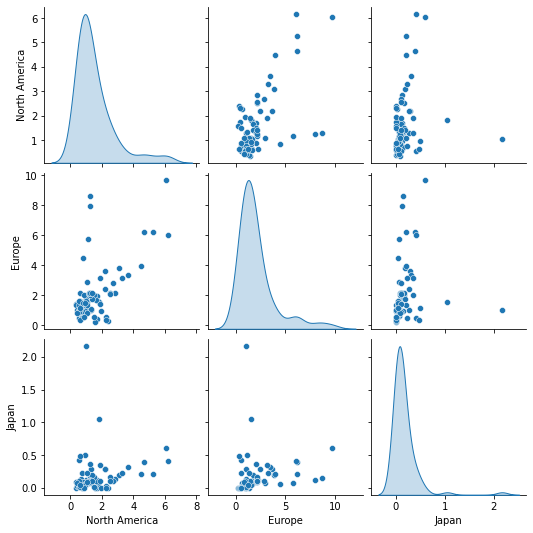

In [ ]:
sns.pairplot(train_df1[["North America", "Europe", "Japan"]], diag_kind="kde")

In [ ]:
train_df1.describe()

,Year,North America,Europe,Japan,Rest of World,Global,Action,Action-Adventure,Adventure,Fighting,MMO,Misc,Platform,Racing,Role-Playing,Shooter,Sports
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,2015.367089,1.544430,2.049241,0.167468,0.700380,4.462278,0.240506,0.088608,0.012658,0.025316,0.012658,0.025316,0.037975,0.050633,0.088608,0.265823,0.151899
std,1.397591,1.239113,1.901100,0.282450,0.543963,3.450087,0.430122,0.285992,0.112509,0.158088,0.112509,0.158088,0.192356,0.220648,0.285992,0.444593,0.361216
min,2013.000000,0.360000,0.250000,0.000000,0.200000,1.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,0.750000,0.935000,0.050000,0.345000,2.175000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,1.090000,1.480000,0.090000,0.510000,3.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.500000,1.850000,2.150000,0.190000,0.735000,4.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2018.000000,6.180000,9.710000,2.170000,3.020000,19.390000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,79.0,2015.367089,1.397591,2013.00,2014.000,2015.00,2016.500,2018.00
North America,79.0,1.544430,1.239113,0.36,0.750,1.09,1.850,6.18
Europe,79.0,2.049241,1.901100,0.25,0.935,1.48,2.150,9.71
Japan,79.0,0.167468,0.282450,0.00,0.050,0.09,0.190,2.17
Rest of World,79.0,0.700380,0.543963,0.20,0.345,0.51,0.735,3.02
Global,79.0,4.462278,3.450087,1.61,2.175,3.28,4.950,19.39
Action,79.0,0.240506,0.430122,0.00,0.000,0.00,0.000,1.00
Action-Adventure,79.0,0.088608,0.285992,0.00,0.000,0.00,0.000,1.00
Adventure,79.0,0.012658,0.112509,0.00,0.000,0.00,0.000,1.00
Fighting,79.0,0.025316,0.158088,0.00,0.000,0.00,0.000,1.00


In [ ]:
train_features = train_df1.copy()
test_features = train_df1.copy()

train_labels = train_features.pop("Global")
test_labels = test_features.pop("Global")

In [ ]:
train_df1.describe().transpose()[["mean", "std"]]

,mean,std
Year,2015.367089,1.397591
North America,1.544430,1.239113
Europe,2.049241,1.901100
Japan,0.167468,0.282450
Rest of World,0.700380,0.543963
Global,4.462278,3.450087
Action,0.240506,0.430122
Action-Adventure,0.088608,0.285992
Adventure,0.012658,0.112509
Fighting,0.025316,0.158088
